# 12.1 모델
---

- knn은 지도 학습이며 분류(classification)에 사용
- 새로운 데이터가 기존 데이터의 그룹 중 어떤 그룹에 속하는지를 분류

In [0]:
# 거리 계산용 function들
import math
from collections import Counter

def subtract(v, w):
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v, w):
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

def sum_of_squares(v):
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14  # 1 * 1 + 2 * 2 + 3 * 3

def magnitude(v):
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

assert magnitude([3, 4]) == 5

def squared_distance(v, w):
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v, w):
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

def distance(v, w):  # type: ignore
    return magnitude(subtract(v, w))

## knn 진행 과정
1. 새로운 데이터 포인트 주위로 k 개의 가장 가까운 포인트를 찾는다.
2. 찾아낸 포인트들의 label 을 보고 다수결로 새로운 데이터 포인트의 label을 정한다
  - 동점인 항목들에 대한 처리가 문제
    1. 여러 1등 중 임의로 하나를 선택
    2. 거리를 가중치로 사용하여 거리 기반 투표
    3. 단독 1등이 생길 때 까지 k를 하나씩 줄인다



In [0]:
def raw_majority_vote(labels): # 동점이 생길 수 있는 다수결 투표
  votes = Counter(labels)
  winner, _ = votes.most_common(1)[0]
  return winner

def majority_vote(labels): # winner 가 하나 남을 때 까지 k를 줄이는 다수결 투표
  vote_counts = Counter(labels)
  winner, winner_count = vote_counts.most_common(1)[0]
  num_winners = len([count for count in vote_counts.values() if count == winner_count])
  if num_winners == 1:
    return winner
  else:
    return majority_vote

In [0]:
from typing import NamedTuple
from typing import List

Vector = List[float]

class LabeledPoint(NamedTuple):
    point: Vector
    label: str

In [0]:
def knn_classify(k, labeled_points, new_point):
  by_distance = sorted(labeled_points, key=lambda lp: distance(lp.point, new_point))
  k_nearest_labels = [lp.point for lp in by_distance[:k]]
  return majority_vote(k_nearest_labels)

In [100]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data.tolist()

for i in range(len(iris.target)):
  iris_data[i].append(iris.target_names[iris.target[i]])
iris_data[:10]

[[5.1, 3.5, 1.4, 0.2, 'setosa'],
 [4.9, 3.0, 1.4, 0.2, 'setosa'],
 [4.7, 3.2, 1.3, 0.2, 'setosa'],
 [4.6, 3.1, 1.5, 0.2, 'setosa'],
 [5.0, 3.6, 1.4, 0.2, 'setosa'],
 [5.4, 3.9, 1.7, 0.4, 'setosa'],
 [4.6, 3.4, 1.4, 0.3, 'setosa'],
 [5.0, 3.4, 1.5, 0.2, 'setosa'],
 [4.4, 2.9, 1.4, 0.2, 'setosa'],
 [4.9, 3.1, 1.5, 0.1, 'setosa']]

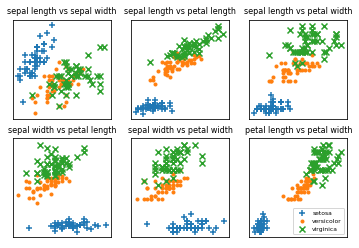

In [101]:
from typing import Dict
import csv
from collections import defaultdict

def parse_iris_row(row: List[str]) -> LabeledPoint:
    """
    sepal_length, sepal_width, petal_length, petal_width, class
    """
    measurements = [float(value) for value in row[:-1]]
    label = row[-1]

    return LabeledPoint(measurements, label)

iris_data = [parse_iris_row(row) for row in iris_data]

points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

from matplotlib import pyplot as plt
metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
marks = ['+', '.', 'x']

fig, ax = plt.subplots(2, 3)

for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker=mark, label=species)

ax[-1][-1].legend(loc='lower right', prop={'size': 6})
plt.show()

In [129]:
knn_classify(3, iris_data, [5.1, 3.5, 1.4, 0.2])

TypeError: ignored